In [1]:
import matplotlib.pyplot as plt
import pickle
import os
import datetime
import numpy as np

In [2]:
with open('powerlaw_alpha_sweep.pkl', 'rb') as f:
    data_alpha_sweep = pickle.load(f)

with open('powerlaw_beta_sweep.pkl', 'rb') as f:
    data_beta_sweep = pickle.load(f)

data_beta_sweep[0.1].keys()

dict_keys(['adversarial_error', 'generalization_error', 'boundary_error', 'betas'])

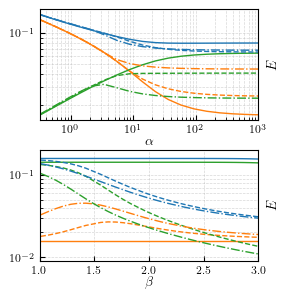

In [4]:
IMG_DIRECTORY = "./Assets/powerlaw"
if not os.path.exists(IMG_DIRECTORY):
    os.makedirs(IMG_DIRECTORY)


def save_plot(fig, name, formats=["pdf","jpg"], date=False):
    current_date = datetime.datetime.now().strftime("%Y-%m-%d")
    for f in formats:        
        path = "{}".format(name) + "_{}".format(current_date) + "." + f
        if not date:
            path = "{}".format(name) + "." + f
        fig.savefig(            
            os.path.join(IMG_DIRECTORY, path),
            format=f,
            bbox_inches='tight' 
        )


def set_size(width, fraction=1, subplots=(1, 1)):
    if width == "thesis":
        width_pt = 426.79135
    elif width == "beamer":
        width_pt = 307.28987
    else:
        width_pt = width

    fig_width_pt = width_pt * fraction
    inches_per_pt = 1 / 72.27

    golden_ratio = (5**0.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    fig_height_in = fig_width_in * (golden_ratio) * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


# width = 1.5 * 458.63788

multiplier = 1.25 
width = multiplier * 487.8225
width = 487.8225
# multiplier = 1.25
# width = multiplier * 1.5 * 234.8775

plt.style.use("../latex_ready.mplstyle")

tuple_size = set_size(width, fraction=0.50)
tuple_size = (2.375,3.4)

multiplier = 0.9
second_multiplier = 0.7


# import Line2D for custom legend
from matplotlib.lines import Line2D

fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=( tuple_size[0], tuple_size[1]),
    gridspec_kw={"hspace": 0.27},
)


# ICML adjustments
fig.subplots_adjust(left=0.05)
# fig.subplots_adjust(bottom=0.16)
fig.subplots_adjust(top=0.85)
fig.subplots_adjust(right=0.97)
# plt.subplots_adjust(bottom=0.30)



# Create a custom legend
custom_legend = []

linestyles = ["solid", "dashed", "dashdot", "dotted"]

for i, dat in enumerate([data_alpha_sweep, data_beta_sweep]):
    for j, (eps, dd) in enumerate(dat.items()):
        if i == 0:
            x_vals = dd["alpha"]
        else:
            x_vals = dd["betas"]

        axes[i].plot(x_vals, dd["generalization_error"], color="C1", linestyle=linestyles[j])
        axes[i].plot(x_vals, dd["adversarial_error"], color="C0", linestyle=linestyles[j])
        axes[i].plot(x_vals, dd["boundary_error"], color="C2", linestyle=linestyles[j])

    axes[i].tick_params(axis='both', which='major', direction='in')

# Set the minor ticks to face inwards
    axes[i].tick_params(axis='both', which='minor', direction='in')

    if i == 0:
        axes[i].set_xscale("log")
    axes[i].set_yscale("log")

    if i == 0:
        axes[i].set_xlim([10**(-0.5), 1000])
    else:
        axes[i].set_xlim([1,3])
        axes[i].set_ylim([0.009,0.2])

    axes[i].yaxis.set_label_position("right")
    axes[i].set_ylabel(r"$E$", labelpad=6.0)

    if i == 0:
        axes[i].set_xlabel(r"$\alpha$", labelpad=0.0)
    else:
        axes[i].set_xlabel(r"$\beta$", labelpad=0.0)

    axes[i].grid(which="both", axis="both", alpha=0.5)

save = True
if save:
    save_plot(
        fig,
        f"powerlaw_together",
    )

plt.show()


